# Imports

In [ ]:
import os
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/MKSS/data')

Mounted at /content/drive


In [ ]:
!ls

death-rate-by-cause-who-mdb.csv
remaining-life-expectancy-at-different-ages-females.csv
remaining-life-expectancy-at-different-ages-males.csv


# Preprocessing

In [ ]:
import pandas as pd
import numpy as np

# List of CSV filenames
csv_files = [
    "death-rate-by-cause-who-mdb.csv",
    "remaining-life-expectancy-at-different-ages-females.csv",
    "remaining-life-expectancy-at-different-ages-males.csv"
]

# Dictionary to store DataFrames
dataframes = {}

# Read each CSV file into a DataFrame
for file in csv_files:
    try:
        df = pd.read_csv(file)
        dataframes[file] = df
        print(f"Loaded {file} successfully.")
    except Exception as e:
        print(f"Failed to load {file}: {e}")


Loaded death-rate-by-cause-who-mdb.csv successfully.
Loaded remaining-life-expectancy-at-different-ages-females.csv successfully.
Loaded remaining-life-expectancy-at-different-ages-males.csv successfully.


In [ ]:
for key, value in dataframes.items():
    print(key, value.columns)

death-rate-by-cause-who-mdb.csv Index(['Entity', 'Code', 'Year',
       'Age-standardized deaths from malignant neoplasms in both sexes per 100,000 people',
       'Age-standardized deaths from cardiovascular diseases in both sexes per 100,000 people',
       'Age-standardized deaths from respiratory infections in both sexes per 100,000 people',
       'Age-standardized deaths from infectious and parasitic diseases in both sexes per 100,000 people',
       'Age-standardized deaths from digestive diseases in both sexes per 100,000 people',
       'Age-standardized deaths from unintentional injuries in both sexes per 100,000 people',
       'Age-standardized deaths from intentional injuries in both sexes per 100,000 people',
       'Age-standardized deaths from neuropsychiatric conditions in both sexes per 100,000 people',
       'Age-standardized deaths from respiratory diseases in both sexes per 100,000 people'],
      dtype='object')
remaining-life-expectancy-at-different-ages-females

In [ ]:
dataframes['remaining-life-expectancy-at-different-ages-males.csv']['Sex'] = 'm'
dataframes['remaining-life-expectancy-at-different-ages-males.csv'] = dataframes['remaining-life-expectancy-at-different-ages-males.csv'].rename(columns={
    'Life expectancy - Type: period - Sex: male - Age: 0' : 'Age: 0',
    'Life expectancy - Type: period - Sex: male - Age: 10' : 'Age: 10',
    'Life expectancy - Type: period - Sex: male - Age: 15' : 'Age: 15',
    'Life expectancy - Type: period - Sex: male - Age: 25' : 'Age: 25',
    'Life expectancy - Type: period - Sex: male - Age: 45' : 'Age: 45',
    'Life expectancy - Type: period - Sex: male - Age: 65' : 'Age: 65',
    'Life expectancy - Type: period - Sex: male - Age: 80' : 'Age: 80'
})
dataframes['remaining-life-expectancy-at-different-ages-males.csv'] = dataframes['remaining-life-expectancy-at-different-ages-males.csv'].drop(columns=['Code'])

In [ ]:
dataframes['remaining-life-expectancy-at-different-ages-females.csv']['Sex'] = 'f'
dataframes['remaining-life-expectancy-at-different-ages-females.csv'] = dataframes['remaining-life-expectancy-at-different-ages-females.csv'].rename(columns={
    'Life expectancy - Type: period - Sex: female - Age: 0' : 'Age: 0',
    'Life expectancy - Type: period - Sex: female - Age: 10' : 'Age: 10',
    'Life expectancy - Type: period - Sex: female - Age: 15' : 'Age: 15',
    'Life expectancy - Type: period - Sex: female - Age: 25' : 'Age: 25',
    'Life expectancy - Type: period - Sex: female - Age: 45' : 'Age: 45',
    'Life expectancy - Type: period - Sex: female - Age: 65' : 'Age: 65',
    'Life expectancy - Type: period - Sex: female - Age: 80' : 'Age: 80'
})
dataframes['remaining-life-expectancy-at-different-ages-females.csv'] = dataframes['remaining-life-expectancy-at-different-ages-females.csv'].drop(columns=['Code'])

In [ ]:
rle = pd.concat([dataframes['remaining-life-expectancy-at-different-ages-males.csv'], dataframes['remaining-life-expectancy-at-different-ages-females.csv']], ignore_index=True)

In [ ]:
rle_long = pd.melt(
    rle,
    id_vars=["Entity", "Year", "Sex"],  # Columns to keep
    value_vars=["Age: 0", "Age: 10", "Age: 15", "Age: 25", "Age: 45", "Age: 65", "Age: 80"],  # Columns to unpivot
    var_name="Age",  # New column name for 'age' values
    value_name="Life_Expectancy"  # New column name for age values
)
rle_long['Age'] = rle_long['Age'].str.replace('Age: ', '')
rle_long['Age'] = rle_long['Age'].astype(int)

In [ ]:
rle_long = rle_long.dropna()

In [ ]:
rle_orig = rle_long.copy()

In [ ]:
rle_orig

,Entity,Year,Sex,Age,Life_Expectancy
0,Afghanistan,1950,m,0,27.1286
1,Afghanistan,1951,m,0,27.3639
2,Afghanistan,1952,m,0,27.8377
3,Afghanistan,1953,m,0,28.3146
4,Afghanistan,1954,m,0,28.6239
...,...,...,...,...,...
278903,Zimbabwe,2017,f,80,7.3342
278904,Zimbabwe,2018,f,80,7.3687
278905,Zimbabwe,2019,f,80,7.3948
278906,Zimbabwe,2020,f,80,7.2447


In [ ]:
dataframes['death-rate-by-cause-who-mdb.csv']

,Entity,Code,Year,"Age-standardized deaths from malignant neoplasms in both sexes per 100,000 people","Age-standardized deaths from cardiovascular diseases in both sexes per 100,000 people","Age-standardized deaths from respiratory infections in both sexes per 100,000 people","Age-standardized deaths from infectious and parasitic diseases in both sexes per 100,000 people","Age-standardized deaths from digestive diseases in both sexes per 100,000 people","Age-standardized deaths from unintentional injuries in both sexes per 100,000 people","Age-standardized deaths from intentional injuries in both sexes per 100,000 people","Age-standardized deaths from neuropsychiatric conditions in both sexes per 100,000 people","Age-standardized deaths from respiratory diseases in both sexes per 100,000 people"
0,Albania,ALB,1987,88.860980,331.37842,69.320970,13.346996,26.685045,20.186192,3.968410,15.738141,26.313232
1,Albania,ALB,1988,99.332530,333.62150,59.967080,11.110825,25.621843,21.611263,3.857150,15.147495,26.932293
2,Albania,ALB,1989,92.817200,339.13010,75.361850,15.654971,25.803211,23.080498,4.757231,16.810797,25.726141
3,Albania,ALB,1992,74.528990,289.65850,64.096940,9.986380,20.881680,28.329859,6.022823,16.140594,21.516480
4,Albania,ALB,1993,66.275505,264.37045,69.783660,13.130654,21.906736,31.997355,9.344987,22.926090,23.432169
...,...,...,...,...,...,...,...,...,...,...,...,...
4771,Venezuela,VEN,2012,98.584920,201.83017,21.126587,24.427929,25.068110,35.470535,36.055940,8.337194,23.721012
4772,Venezuela,VEN,2013,96.557110,196.01802,23.221132,23.704365,25.595743,34.102210,31.627296,8.256356,23.691648
4773,Venezuela,VEN,2014,98.284260,212.63083,25.174698,27.475836,27.808544,32.278560,32.315693,9.132934,26.519331
4774,Venezuela,VEN,2015,96.911890,208.01509,27.281538,28.887978,25.773838,28.171406,38.241080,10.271980,26.790356


In [ ]:
print(dataframes['death-rate-by-cause-who-mdb.csv']['Entity'].unique())

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria' 'Canada'
 'Cape Verde' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Georgia' 'Germany'
 'Greece' 'Grenada' 'Guadeloupe' 'Guatemala' 'Guyana' 'Hong Kong'
 'Hungary' 'Iceland' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Maldives' 'Malta' 'Martinique'
 'Mauritius' 'Mayotte' 'Mexico' 'Moldova' 'Mongolia' 'Montenegro'
 'Netherlands' 'New Zealand' 'Nicaragua' 'North Macedonia' 'Norway' 'Oman'
 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Reunion' 'Romania' 'Russia' 'Saint Lucia'
 'Saint Vincent an

In [ ]:
print(rle_orig['Entity'].unique())

['Afghanistan' 'Africa (UN)' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Asia (UN)' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'England and Wales' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe (UN)' 'Falkland Islands' 'Faroe Islands' 'Fiji'
 'Finland' 'France' 'French Guiana' 

In [ ]:
common_values = np.intersect1d(dataframes['death-rate-by-cause-who-mdb.csv']['Entity'].unique(), rle_orig['Entity'].unique())

In [ ]:
rle2 = rle_orig[rle_orig['Entity'].isin(common_values)]

In [ ]:
rle2 = rle2.reset_index(drop=True)

In [ ]:
rle2 # currently not in use

,Entity,Year,Sex,Age,Life_Expectancy
0,Albania,1950,m,0,41.2689
1,Albania,1951,m,0,41.6754
2,Albania,1952,m,0,42.5702
3,Albania,1953,m,0,43.2038
4,Albania,1954,m,0,44.3062
...,...,...,...,...,...
135543,Venezuela,2017,f,80,6.8626
135544,Venezuela,2018,f,80,6.9716
135545,Venezuela,2019,f,80,6.9862
135546,Venezuela,2020,f,80,6.9346


In [ ]:
causes = dataframes['death-rate-by-cause-who-mdb.csv']
causes = causes.drop(columns=['Code'])

In [ ]:
causes

,Entity,Year,"Age-standardized deaths from malignant neoplasms in both sexes per 100,000 people","Age-standardized deaths from cardiovascular diseases in both sexes per 100,000 people","Age-standardized deaths from respiratory infections in both sexes per 100,000 people","Age-standardized deaths from infectious and parasitic diseases in both sexes per 100,000 people","Age-standardized deaths from digestive diseases in both sexes per 100,000 people","Age-standardized deaths from unintentional injuries in both sexes per 100,000 people","Age-standardized deaths from intentional injuries in both sexes per 100,000 people","Age-standardized deaths from neuropsychiatric conditions in both sexes per 100,000 people","Age-standardized deaths from respiratory diseases in both sexes per 100,000 people"
0,Albania,1987,88.860980,331.37842,69.320970,13.346996,26.685045,20.186192,3.968410,15.738141,26.313232
1,Albania,1988,99.332530,333.62150,59.967080,11.110825,25.621843,21.611263,3.857150,15.147495,26.932293
2,Albania,1989,92.817200,339.13010,75.361850,15.654971,25.803211,23.080498,4.757231,16.810797,25.726141
3,Albania,1992,74.528990,289.65850,64.096940,9.986380,20.881680,28.329859,6.022823,16.140594,21.516480
4,Albania,1993,66.275505,264.37045,69.783660,13.130654,21.906736,31.997355,9.344987,22.926090,23.432169
...,...,...,...,...,...,...,...,...,...,...,...
4771,Venezuela,2012,98.584920,201.83017,21.126587,24.427929,25.068110,35.470535,36.055940,8.337194,23.721012
4772,Venezuela,2013,96.557110,196.01802,23.221132,23.704365,25.595743,34.102210,31.627296,8.256356,23.691648
4773,Venezuela,2014,98.284260,212.63083,25.174698,27.475836,27.808544,32.278560,32.315693,9.132934,26.519331
4774,Venezuela,2015,96.911890,208.01509,27.281538,28.887978,25.773838,28.171406,38.241080,10.271980,26.790356


In [ ]:
# Identify the columns containing death rates
death_columns = [col for col in causes.columns if col.startswith("Age-standardized deaths")]

# Add a new column 'Cause' with the name of the column having the maximum value in each row
causes['Cause'] = causes[death_columns].idxmax(axis=1)

# Drop the death rate columns
causes = causes.drop(columns=death_columns)

# Standardize the cause column values
causes['Cause'] = causes['Cause'].str.replace('Age-standardized deaths from ', '')
causes['Cause'] = causes['Cause'].str.replace(' in both sexes per 100,000 people', '')

In [ ]:
causes

,Entity,Year,Cause
0,Albania,1987,cardiovascular diseases
1,Albania,1988,cardiovascular diseases
2,Albania,1989,cardiovascular diseases
3,Albania,1992,cardiovascular diseases
4,Albania,1993,cardiovascular diseases
...,...,...,...
4771,Venezuela,2012,cardiovascular diseases
4772,Venezuela,2013,cardiovascular diseases
4773,Venezuela,2014,cardiovascular diseases
4774,Venezuela,2015,cardiovascular diseases


In [ ]:
causes['Cause'].unique() #Not all are cardiovasular diseases

array(['cardiovascular diseases', 'respiratory infections',
       'unintentional injuries', 'malignant neoplasms',
       'infectious and parasitic diseases', 'digestive diseases'],
      dtype=object)

In [ ]:
causes['Cause'].value_counts()

,count
Cause,
cardiovascular diseases,4295
malignant neoplasms,391
infectious and parasitic diseases,73
respiratory infections,13
digestive diseases,3
unintentional injuries,1


# LinearRegression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Check for missing values and drop rows with NaN
rle_long = rle_long.dropna()

# Encode categorical features
entity_encoder = LabelEncoder()
sex_encoder = LabelEncoder()
entity_encoder.fit(rle_long["Entity"])
sex_encoder.fit(rle_long["Sex"])
rle_long["Entity"] = entity_encoder.transform(rle_long["Entity"])  # Encode nationality
rle_long["Sex"] = sex_encoder.transform(rle_long["Sex"])        # Encode sex (e.g., Male=0, Female=1)

# Define features and target variable
features = ["Entity", "Year", "Sex", "Age"]
target = "Life_Expectancy"

X = rle_long[features]  # Feature matrix
y = rle_long[target]    # Target vector


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 37.59912692399113
R-squared Score: 0.9222745202165095


In [ ]:
new_data = pd.DataFrame({
    "Entity": [entity_encoder.transform(["Afghanistan"])],  # Replace with the desired nationality
    "Year": [2024],                                      # Replace with the birth year
    "Sex": [sex_encoder.transform(["m"])],               # Use sex_encoder here
    "Age": [22]                                          # Replace with the age
})

# Predict life expectancy
predicted_life_expectancy = model.predict(new_data)
print(f"Predicted Life Expectancy: {predicted_life_expectancy[0]:.2f}")

Predicted Life Expectancy: 50.11


# XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode 'Entity' and 'Cause' columns
entity_encoder_2 = LabelEncoder()
cause_encoder = LabelEncoder()

causes['Entity'] = entity_encoder_2.fit_transform(causes['Entity'])
causes['Cause'] = cause_encoder.fit_transform(causes['Cause'])

# Features and target variable
X = causes[['Entity', 'Year']]
y = causes['Cause']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
model_cause = XGBClassifier(eval_metric='logloss')
model_cause.fit(X_train, y_train)

# Make predictions
y_pred = model_cause.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.9853556485355649


# Death Year Predictor

ENTITY:['Afghanistan' 'Africa (UN)' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Asia (UN)' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'England and Wales' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe (UN)' 'Falkland Islands' 'Faroe Islands' 'Fiji'
 'Finland' 'France' 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland' 'Grenada'
 'Guadeloupe' 'Guam' 'Guatemala' 'Guernsey' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'High-income countries' 'Honduras' 'Hong Kong' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Isle of Man'
 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jersey' 'Jordan' 'Kazakhstan' 'Kenya'
 'Kiribati' 'Kosovo' 'Kuwait' 'Kyrgyzstan'
 'Land-locked Developing Countries (LLDC)' 'Laos'
 'Latin America and the Caribbean (UN)' 'Latvia'
 'Least developed countries' 'Lebanon' 'Lesotho' 'Less developed regions'
 'Less developed regions, excluding China'
 'Less developed regions, excluding least developed countries' 'Liberia'
 'Libya' 'Liechtenstein' 'Lithuania' 'Low-income countries'
 'Lower-middle-income countries' 'Luxembourg' 'Macao' 'Madagascar'
 'Malawi' 'Malaysia' 'Maldives' 'Mali' 'Malta' 'Marshall Islands'
 'Martinique' 'Mauritania' 'Mauritius' 'Mayotte' 'Mexico'
 'Micronesia (country)' 'Middle-income countries' 'Moldova' 'Monaco'
 'Mongolia' 'Montenegro' 'Montserrat' 'More developed regions' 'Morocco'
 'Mozambique' 'Myanmar' 'Namibia' 'Nauru' 'Nepal' 'Netherlands'
 'New Caledonia' 'New Zealand' 'Nicaragua' 'Niger' 'Nigeria' 'Niue'
 'No income group available' 'North Korea' 'North Macedonia'
 'Northern America (UN)' 'Northern Ireland' 'Northern Mariana Islands'
 'Norway' 'Oceania (UN)' 'Oman' 'Pakistan' 'Palau' 'Palestine' 'Panama'
 'Papua New Guinea' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Reunion' 'Romania' 'Russia' 'Rwanda'
 'Saint Barthelemy' 'Saint Helena' 'Saint Kitts and Nevis' 'Saint Lucia'
 'Saint Martin (French part)' 'Saint Pierre and Miquelon'
 'Saint Vincent and the Grenadines' 'Samoa' 'San Marino'
 'Sao Tome and Principe' 'Saudi Arabia' 'Scotland' 'Senegal' 'Serbia'
 'Seychelles' 'Sierra Leone' 'Singapore' 'Sint Maarten (Dutch part)'
 'Slovakia' 'Slovenia' 'Small Island Developing States (SIDS)'
 'Solomon Islands' 'Somalia' 'South Africa' 'South Korea' 'South Sudan'
 'Spain' 'Sri Lanka' 'Sudan' 'Suriname' 'Sweden' 'Switzerland' 'Syria'
 'Taiwan' 'Tajikistan' 'Tanzania' 'Thailand' 'Togo' 'Tokelau' 'Tonga'
 'Trinidad and Tobago' 'Tunisia' 'Turkey' 'Turkmenistan'
 'Turks and Caicos Islands' 'Tuvalu' 'Uganda' 'Ukraine'
 'United Arab Emirates' 'United Kingdom' 'United States'
 'United States Virgin Islands' 'Upper-middle-income countries' 'Uruguay'
 'Uzbekistan' 'Vanuatu' 'Venezuela' 'Vietnam' 'Wallis and Futuna'
 'Western Sahara' 'World' 'Yemen' 'Zambia' 'Zimbabwe']

SEX:['m', 'f']

AGE: positive integer

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
today = datetime.now()
entity = input('Enter nationality: ')
year = today.year
sex = input('Enter sex: ')
age = int(input('Enter age: '))

data = pd.DataFrame({
    "Entity": entity_encoder.transform([entity]),
    "Year": [year],
    "Sex": sex_encoder.transform([sex]),
    "Age": [age]
})

# Predict life expectancy
predicted_life_expectancy = model.predict(data)
whole_years = int(predicted_life_expectancy)  # Whole years
fractional_years = predicted_life_expectancy - whole_years  # Fractional part (e.g., 0.12345)
# Calculate the number of days in the fractional year (approximation)
days_in_fractional_year = int(365.25 * fractional_years)  # Using 365.25 to account for leap years
# Add years and days to today
future_date = today + relativedelta(years=whole_years, days=days_in_fractional_year)
formatted_future_date = future_date.strftime("%d/%m/%Y at %H:%M")
print(f"You will die on {formatted_future_date}")


Enter nationality: Estonia
Enter sex: m
Enter age: 21
You will die on 13/11/2075 at 11:51


# Death Year and Cause Predictor

ENTITY: ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria' 'Canada'
 'Cape Verde' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Georgia' 'Germany'
 'Greece' 'Grenada' 'Guadeloupe' 'Guatemala' 'Guyana' 'Hong Kong'
 'Hungary' 'Iceland' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Maldives' 'Malta' 'Martinique'
 'Mauritius' 'Mayotte' 'Mexico' 'Moldova' 'Mongolia' 'Montenegro'
 'Netherlands' 'New Zealand' 'Nicaragua' 'North Macedonia' 'Norway' 'Oman'
 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Reunion' 'Romania' 'Russia' 'Saint Lucia'
 'Saint Vincent and the Grenadines' 'Sao Tome and Principe' 'Saudi Arabia'
 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia' 'South Africa'
 'South Korea' 'Spain' 'Sri Lanka' 'Suriname' 'Sweden' 'Switzerland'
 'Syria' 'Tajikistan' 'Thailand' 'Trinidad and Tobago' 'Turkey'
 'Turkmenistan' 'Ukraine' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Uruguay' 'Uzbekistan' 'Venezuela']

SEX: ['m', 'f']

AGE: non-negative integer

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
today = datetime.now()
entity = input('Enter nationality: ')
year = today.year
sex = input('Enter sex: ')
age = int(input('Enter age: '))

data = pd.DataFrame({
    "Entity": entity_encoder.transform([entity]),
    "Year": [year],
    "Sex": sex_encoder.transform([sex]),
    "Age": [age]
})

data2 = pd.DataFrame({
    "Entity": entity_encoder_2.transform([entity]),
    "Year": [year]
})

# Predict life expectancy
predicted_life_expectancy = model.predict(data)
predicted_cause = model_cause.predict(data2[['Entity', 'Year']])
whole_years = int(predicted_life_expectancy)  # Whole years
fractional_years = predicted_life_expectancy - whole_years  # Fractional part (e.g., 0.12345)
# Calculate the number of days in the fractional year (approximation)
days_in_fractional_year = int(365.25 * fractional_years)  # Using 365.25 to account for leap years
# Add years and days to today
future_date = today + relativedelta(years=whole_years, days=days_in_fractional_year)
formatted_future_date = future_date.strftime("%d/%m/%Y at %H:%M")
print(f"You will die on {formatted_future_date}")
print(f"You will die of {cause_encoder.inverse_transform([predicted_cause])[0]}")

Enter nationality: Estonia
Enter sex: m
Enter age: 21
You will die on 13/11/2075 at 11:52
You will die of cardiovascular diseases


# Plotting

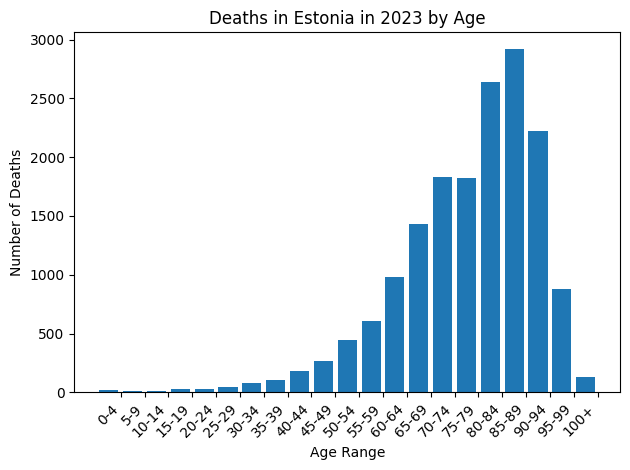

In [48]:
import matplotlib.pyplot as plt
import numpy as np

data = [24, 12, 9.000001, 26, 26, 47, 81, 108, 178, 270, 446, 611, 982, 1431, 1832, 1821.0001, 2639, 2916, 2225, 879, 128]
# Data is from 'annual-deaths-by-age.csv' file, row 5107
age_ranges = [
    "0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39",
    "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74",
    "75-79", "80-84", "85-89", "90-94", "95-99", "100+"
]

positions = np.arange(len(data)) + 0.5

plt.bar(range(len(data)), data, width=0.8)
plt.xticks(positions, age_ranges, rotation=45, ha="right")
plt.xlabel("Age Range")
plt.ylabel("Number of Deaths")
plt.title("Deaths in Estonia in 2023 by Age")
plt.tight_layout()
plt.show()
